# WeatherPy

In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from time import sleep

# import api key
from config import weather_api_key

# import to determine city based on latitude and longitude
from citipy import citipy

# set up output file
output_data_file = "../data/cities.csv"

# ranges of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# list for holding lat_lngs and cities
lat_lngs = []
cities = []

# create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count
len(cities)

625

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
# set base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# establish empty lists for variables of interest
citis = []
countries = []
date = []
lat = []
lng = []
temp = []
humidity = []
windSpeed = []
cloudiness = []

# establish iterator
i = 1

# loop through cities list and compile weather data
for city in cities:
    
# make api call for city
    # store data if call is successful
    try:
        print(f"Retrieving results for city {i} of {len(cities)}: {city}")
        response = requests.get(f"{base_url}appid={weather_api_key}&q={city}&units=imperial").json()
        
        citis.append(response["name"])
        countries.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        windSpeed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        
    # print message if call fails
    except:
        print(f"{city} not found. Skipping ...")
    
    # incriment counter
    i += 1
    
    # wait 3 seconds between every 25th api call
    if i % 25 == 0:
        sleep(3)

# use lists to create dictionary & dataframe
weatherDict = {"City": citis,
               "Country": countries,
               "Date": date,
               "Latitude": lat,
               "Longitude": lng,
               "Max Temp": temp,
               "Humidity": humidity,
               "Wind Speed": windSpeed,
               "Cloudiness": cloudiness}

# convert dictionary to data frame
weatherData = pd.DataFrame(weatherDict)

Retrieving results for city 1 of 625: punta arenas
Retrieving results for city 2 of 625: cloquet
Retrieving results for city 3 of 625: traverse city
Retrieving results for city 4 of 625: hofn
Retrieving results for city 5 of 625: cairns
Retrieving results for city 6 of 625: victoria
Retrieving results for city 7 of 625: atuona
Retrieving results for city 8 of 625: kieta
Retrieving results for city 9 of 625: kushmurun
Retrieving results for city 10 of 625: meulaboh
Retrieving results for city 11 of 625: dikson
Retrieving results for city 12 of 625: hermanus
Retrieving results for city 13 of 625: banikoara
Retrieving results for city 14 of 625: codrington
Retrieving results for city 15 of 625: batagay-alyta
Retrieving results for city 16 of 625: suntar
Retrieving results for city 17 of 625: kaitangata
Retrieving results for city 18 of 625: tuktoyaktuk
Retrieving results for city 19 of 625: barrow
Retrieving results for city 20 of 625: sola
Retrieving results for city 21 of 625: shahrud
R

Retrieving results for city 160 of 625: ziro
Retrieving results for city 161 of 625: belushya guba
belushya guba not found. Skipping ...
Retrieving results for city 162 of 625: lasa
Retrieving results for city 163 of 625: aykhal
Retrieving results for city 164 of 625: gwanda
Retrieving results for city 165 of 625: gondar
Retrieving results for city 166 of 625: vilhena
Retrieving results for city 167 of 625: saint george
Retrieving results for city 168 of 625: nador
Retrieving results for city 169 of 625: gushi
Retrieving results for city 170 of 625: praia da vitoria
Retrieving results for city 171 of 625: honningsvag
Retrieving results for city 172 of 625: novoseleznevo
Retrieving results for city 173 of 625: nantucket
Retrieving results for city 174 of 625: galesong
Retrieving results for city 175 of 625: busko-zdroj
Retrieving results for city 176 of 625: tucuma
Retrieving results for city 177 of 625: ayan
Retrieving results for city 178 of 625: marathon
Retrieving results for city 1

Retrieving results for city 322 of 625: faanui
Retrieving results for city 323 of 625: ugoofaaru
Retrieving results for city 324 of 625: chengde
Retrieving results for city 325 of 625: nanhyanga
Retrieving results for city 326 of 625: la ligua
Retrieving results for city 327 of 625: magistralnyy
Retrieving results for city 328 of 625: les cayes
Retrieving results for city 329 of 625: killybegs
Retrieving results for city 330 of 625: henties bay
Retrieving results for city 331 of 625: bardiyah
Retrieving results for city 332 of 625: mount isa
Retrieving results for city 333 of 625: caravelas
Retrieving results for city 334 of 625: kalachinsk
Retrieving results for city 335 of 625: santa lucia
Retrieving results for city 336 of 625: grand gaube
Retrieving results for city 337 of 625: ibicui
Retrieving results for city 338 of 625: rome
Retrieving results for city 339 of 625: upernavik
Retrieving results for city 340 of 625: muros
Retrieving results for city 341 of 625: cabo rojo
Retrievin

Retrieving results for city 480 of 625: port keats
Retrieving results for city 481 of 625: lagoa
Retrieving results for city 482 of 625: bama
Retrieving results for city 483 of 625: milcoiu
Retrieving results for city 484 of 625: fostoria
Retrieving results for city 485 of 625: vanimo
Retrieving results for city 486 of 625: sim
Retrieving results for city 487 of 625: salinopolis
Retrieving results for city 488 of 625: port-gentil
Retrieving results for city 489 of 625: aketi
Retrieving results for city 490 of 625: champerico
Retrieving results for city 491 of 625: allauch
Retrieving results for city 492 of 625: bermeo
Retrieving results for city 493 of 625: mielec
Retrieving results for city 494 of 625: abu dhabi
Retrieving results for city 495 of 625: kyzyl-suu
Retrieving results for city 496 of 625: vanavara
Retrieving results for city 497 of 625: llanes
Retrieving results for city 498 of 625: ahipara
Retrieving results for city 499 of 625: cockburn harbour
cockburn harbour not found

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Temperature vs. Latitude

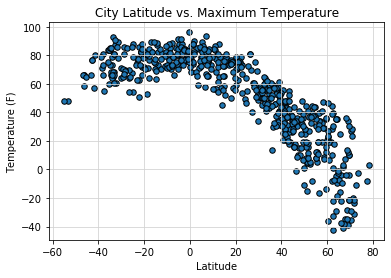

In [5]:
# create the figure
fig, ax = plt.subplots()

# plot data
weatherData.plot.scatter("Latitude", "Max Temp", ax = ax, s = 30, edgecolor = "black")

# add labels, title
ax.set_title("City Latitude vs. Maximum Temperature")
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature (F)")

# add grid lines
ax.grid(color = "lightgray")

plt.savefig("../plots/MaxTemp_scatter")

* This code is creating a plot that displays the relationship between latitude of a city and maximum recorded temperature. The relationship makes sense logically, with city temperature peaking around the equator, and dropping as it gets further away in either direction.

#### Humidity vs. Latitude

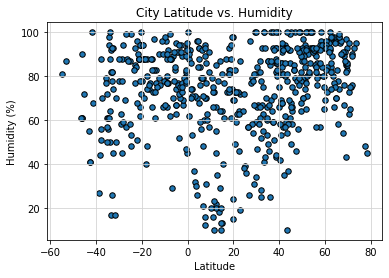

In [6]:
# create the figure
fig, ax = plt.subplots()

# plot data
weatherData.plot.scatter("Latitude", "Humidity", ax = ax, s = 30, edgecolor = "black")

# add labels, title
ax.set_title("City Latitude vs. Humidity")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")

# add grid lines
ax.grid(color = "lightgray")

plt.savefig("../plots/Humidity_scatter")

* This code is creating a plot that displays the relationship between latitude of a city and humidity. There is no visible relationship here, though humidity world-wide seems to be relatively high at the moment.

#### Cloudiness vs. Latitude

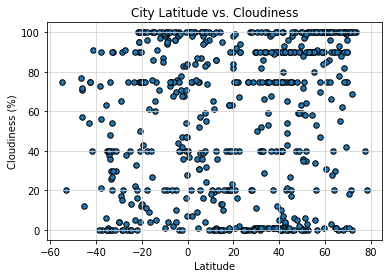

In [7]:
# create the figure
fig, ax = plt.subplots()

# plot data
weatherData.plot.scatter("Latitude", "Cloudiness", ax = ax, s = 30, edgecolor = "black")

# add labels, title
ax.set_title("City Latitude vs. Cloudiness")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")

# add grid lines
ax.grid(color = "lightgray")

plt.savefig("../plots/Cloudiness_scatter")

* This code is creating a plot that displays the relationship between latitude of a city and cloudiness. Again, there is no visible relationship here. I am not sure how this is recorded but there does seem to be a bias toward certain percentages.

#### Wind Speed vs. Latitude

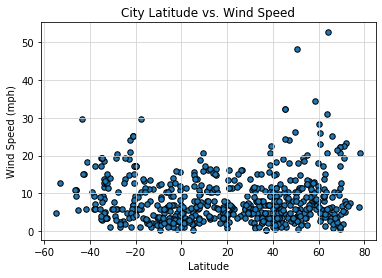

In [8]:
# create the figure
fig, ax = plt.subplots()

# plot data
weatherData.plot.scatter("Latitude", "Wind Speed", ax = ax, s = 30, edgecolor = "black")

# add labels, title
ax.set_title("City Latitude vs. Wind Speed")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")

# add grid lines
ax.grid(color = "lightgray")

plt.savefig("../plots/WindSpeed_scatter")

* This code is creating a plot that displays the relationship between latitude of a city and wind speed. Yet again, no visible relationship here.

## Linear Regression

In [9]:
# subset relevant columns from main data frame
dataSubset = weatherData[["Latitude", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

# break dataframe into northern/southern hemispheres
northern = dataSubset["Latitude"] > 0
northData = dataSubset[northern]

southern = dataSubset["Latitude"] < 0
southData = dataSubset[southern]

#### Create Function to Plot Data & Display Regression Information

In [10]:
def regressAndPlot(x, y, hemisphere, xlabel, ylabel):
    
    # perform regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # create the figure
    fig, ax = plt.subplots()
    
    # plot data
    ax.scatter(x, y)
    
    # add labels, title
    ax.set_title(f"{hemisphere} Hemisphere: {ylabel} vs. {xlabel}")
    ax.set_xlabel(f"{xlabel}")
    ax.set_ylabel(f"{ylabel}")
    
    # add grid lines
    ax.grid(color = "lightgray")
    
    # add regression line & equation
    ax.plot(x, regress_values, color = "red")
    print(f"Regression Equation: {line_eq}")
    print(f"R-Squared: {round(rvalue ** 2, 2)}")
    
    # show plot
    plt.show()

#### Northern Hemisphere - Temperatue vs. Latitude

Regression Equation: y = -1.29x + 89.77
R-Squared: 0.75


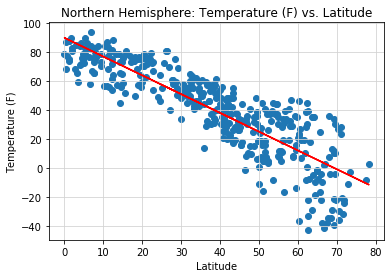

<Figure size 432x288 with 0 Axes>

In [11]:
# select data
x = northData["Latitude"]
y = northData["Max Temp"]

regressAndPlot(x, y, "Northern", "Latitude", "Temperature (F)")

plt.savefig("../plots/NH_MaxTemp_regression")

* The plot here shows that there is a negative correlation between city latitude and maximum temperature. Specifically, for every additional degree of latitiude, maximum temperature decreases by 1.34 degrees Farenheit. The r-squared for this regression is 0.75, meaning 75% of the variation in the data is explained by this model.

#### Southern Hemisphere - Temperatue vs. Latitude

Regression Equation: y = 0.27x + 81.3
R-Squared: 0.15


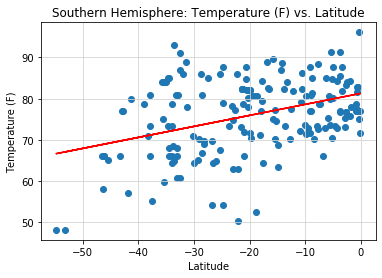

<Figure size 432x288 with 0 Axes>

In [12]:
# select data
x = southData["Latitude"]
y = southData["Max Temp"]

regressAndPlot(x, y, "Southern", "Latitude", "Temperature (F)")

plt.savefig("../plots/SH_MaxTemp_regression")

* This plot shows the relationship between city latitude and maximum temperature in the southern hemisphere. Here, there is a positive correlation between latitude and temperature. For every additional degree of latitude, temperature increases by 0.28 degrees farenheit. With an r-squared of 0.14, however, this relationship is not quite as reliable as the one seen in the northern hemisphere.

#### Northern Hemisphere - Humidity vs. Latitude

Regression Equation: y = 0.38x + 59.28
R-Squared: 0.13


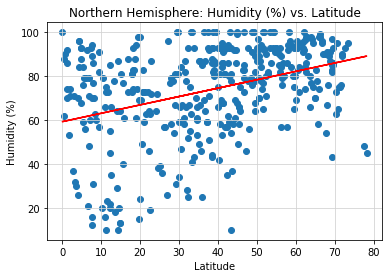

<Figure size 432x288 with 0 Axes>

In [13]:
# select data
x = northData["Latitude"]
y = northData["Humidity"]

regressAndPlot(x, y, "Northern", "Latitude", "Humidity (%)")

plt.savefig("../plots/NH_Humidity_regression")

* Here we see that there is a slight, positive correlation between humidity and city latitude in the northern hemisphere. For each degree of latitude, humidity increases by 0.39%. With an r-squared of 0.16, this model does not fit the data particularly well.

#### Southern Hemisphere - Humidity vs. Latitude

Regression Equation: y = 0.32x + 82.28
R-Squared: 0.06


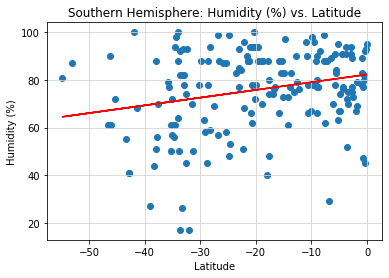

<Figure size 432x288 with 0 Axes>

In [14]:
# select data
x = southData["Latitude"]
y = southData["Humidity"]

regressAndPlot(x, y, "Southern", "Latitude", "Humidity (%)")

plt.savefig("../plots/SH_Humidity_regression")

* Here we see that there is a slight, positive correlation between humidity and city latitude in the southern hemisphere. Interestingly, this follows a pretty similar relationship to the northern hemisphere, rather than being the inverse. For each degree of latitude, humidity increases by 0.46%. With an r-squared of 0.09, this model does not fit the data particularly well.

#### Northern Hemisphere - Cloudiness vs. Latitude

Regression Equation: y = 0.34x + 44.66
R-Squared: 0.03


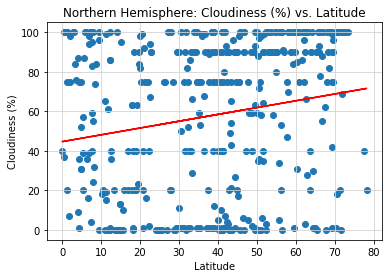

<Figure size 432x288 with 0 Axes>

In [15]:
# select data
x = northData["Latitude"]
y = northData["Cloudiness"]

regressAndPlot(x, y, "Northern", "Latitude", "Cloudiness (%)")

plt.savefig("../plots/NH_Cloudiness_regression")

* This plot shows the relationship between city latitude and cloudiness in the northern hemisphere. Although the relationship is positive (0.36% increase in cloudiness per degree of latitude), it fits the data very poorly, with an r-squared value of 0.03.

#### Southern Hemisphere - Cloudiness vs. Latitude

Regression Equation: y = 0.67x + 65.96
R-Squared: 0.06


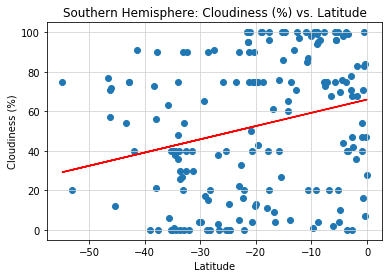

<Figure size 432x288 with 0 Axes>

In [16]:
# select data
x = southData["Latitude"]
y = southData["Cloudiness"]

regressAndPlot(x, y, "Southern", "Latitude", "Cloudiness (%)")

plt.savefig("../plots/SH_Cloudiness_regression")

* This plot shows the relationship between city latitude and cloudiness in the southern hemisphere. Although the relationship is positive (0.64% increase in cloudiness per degree of latitude), it fits the data very poorly, with an r-squared value of 0.05.

#### Northern Hemisphere - Wind Speed vs. Latitude

Regression Equation: y = 0.06x + 6.15
R-Squared: 0.03


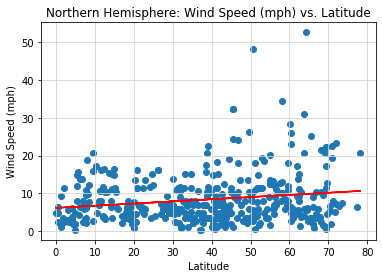

<Figure size 432x288 with 0 Axes>

In [17]:
# select data
x = northData["Latitude"]
y = northData["Wind Speed"]

regressAndPlot(x, y, "Northern", "Latitude", "Wind Speed (mph)")

plt.savefig("../plots/NH_WindSpeed_regression")

* This plot shows the relationship between city latitude and wind speed in the northern hemisphere. There is a slight, positive correlation (0.05 mph increase in wind speed per degree of latitude), it fits the data very poorly, with an r-squared value of 0.02.

#### Southern Hemisphere - Wind Speed vs. Latitude

Regression Equation: y = -0.14x + 5.85
R-Squared: 0.08


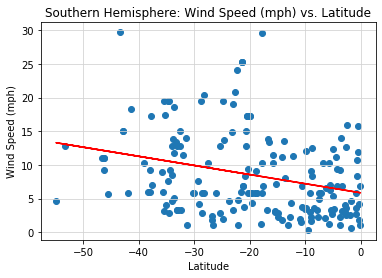

<Figure size 432x288 with 0 Axes>

In [18]:
# select data
x = southData["Latitude"]
y = southData["Wind Speed"]

regressAndPlot(x, y, "Southern", "Latitude", "Wind Speed (mph)")

plt.savefig("../plots/SH_WindSpeed_regression")

* This plot shows the relationship between city latitude and wind speed in the northern hemisphere. There is a slight, negative correlation (0.14 mph decrease in wind speed per degree of latitude), it does not fit the data very well, with an r-squared value of 0.1.

#### Save Data to CSV

In [19]:
weatherData.to_csv(output_data_file, index = False)